In [1]:
import numpy as np
import scipy, matplotlib
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

names = ["age","workclass","fnlwgt","education",
          "education-num","marital-status","occupation",
          "relationship","race","sex","capital-gain","capital-loss",
          "hous-per-week","native-country","income"]

top_7_features =[]
# Do the data preprocessing before training the models
def preprocessingData(data):
    
# remove the data with null values
    data=data.dropna(thresh=1)
# encoding out dataset which can be categoried
    cat_mask = data.dtypes==object
    cat_cols = data.columns[cat_mask].tolist()
    non_cat_mask = data.dtypes!=object
    non_cat_cols = data.columns[non_cat_mask].tolist()
    le = LabelEncoder()
    data[cat_cols] = data[cat_cols].apply(lambda col: le.fit_transform(col))

# Standarization of data
    sc = StandardScaler()
    data[non_cat_cols] = sc.fit_transform(data[non_cat_cols])
    # print(data_train[non_cat_cols])
    
# split the data values and target values 
    x = data.iloc[: , :-1].values
    y= data.iloc[: , 14:].values.ravel()
    return x,y

# get the info about the model prediction 
def predictInfo(classifier, name):
    
    print("-----" + name + "------")
    
    y_train_pred = classifier.predict(df_x)
    print('Mismatched training data:', (df_y != y_train_pred).sum())

    y_test_pred = classifier.predict(df_x_v)
    print('Mismatched test data:', (df_y_v != y_test_pred).sum())
    
    # Normalized score accuracy 
    print('Accuracy score: %.5f' % accuracy_score(df_y_v, y_test_pred))
    plotROC(classifier)
    if name == "Random Forest":
        featureImportance(classifier)

# To plot the ROC graph
def plotROC (classifier):
    probs = classifier.predict_proba(df_x_v)
    probs = probs[:, 1]
    auc = roc_auc_score(df_y_v, probs)
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(df_y_v, probs)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# To plot the feature importance
def featureImportance(classifier):
    importances = classifier.feature_importances_
    std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    xName =[]
    for i in indices.tolist():
        xName.append(names[i])
        if len(top_7_features) < 7 :
            top_7_features.append(i)
    # Plot the feature importances 
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(df_x.shape[1]), importances[indices],
           color="b", yerr=std[indices], align="center")
    plt.xticks(range(df_x.shape[1]), xName,rotation=90)
    plt.xlim([-1, df_x.shape[1]])
    plt.show()

print ("Library and functions laoded")

Library and functions laoded


In [2]:
# import the data
data_train = pd.read_csv("dataset/adult.data",header=None, names =names) 
data_test = pd.read_csv("dataset/adult.test",header=None, names =names) 

# preprocess the data and get back the formatted training and testing data set
df_x, df_y = preprocessingData(data_train)
df_x_v, df_y_v = preprocessingData(data_test)

print("Data imported")
print("Data preprocessed")

Data imported
Data preprocessed


-----Logistic Regression------
Mismatched training data: 5701
Mismatched test data: 2859
Accuracy score: 0.82440
AUC: 0.85


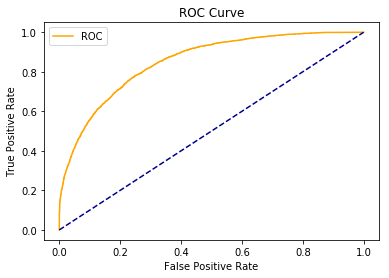

-----Decision Tree------
Mismatched training data: 1
Mismatched test data: 3183
Accuracy score: 0.80450
AUC: 0.73


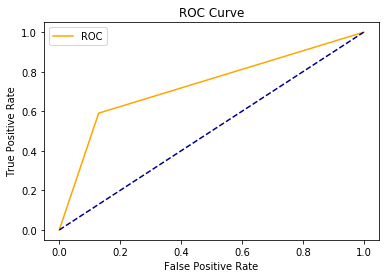

In [3]:
# run it in Logistic Regression
lr = LogisticRegression(max_iter=100, tol=1e-3, C=1, solver='liblinear', multi_class='ovr')
lr = lr.fit(df_x, df_y)
predictInfo(lr,"Logistic Regression")


# run it in Decision Tree
dt = DecisionTreeClassifier()
dt = dt.fit(df_x,df_y)
predictInfo(dt,"Decision Tree")

-----K-3 neighbors vote------
Mismatched training data: 3357
Mismatched test data: 2952
Accuracy score: 0.81868
AUC: 0.81


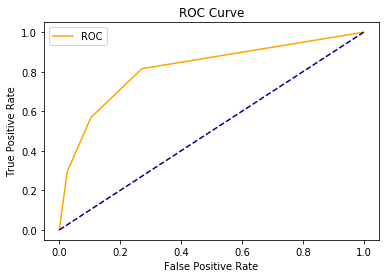

-----K-5 neighbors vote------
Mismatched training data: 3962
Mismatched test data: 2828
Accuracy score: 0.82630
AUC: 0.85


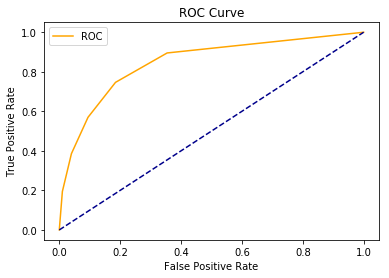

-----K-7 neighbors vote------
Mismatched training data: 4317
Mismatched test data: 2783
Accuracy score: 0.82906
AUC: 0.86


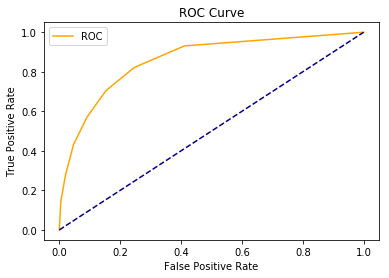

In [4]:
# run it in K-nearest neighbors vote
from sklearn.neighbors import KNeighborsClassifier
kneigh_3 = KNeighborsClassifier(n_neighbors=3)
kneigh_3 = kneigh_3.fit(df_x,df_y)
predictInfo(kneigh_3,"K-3 neighbors vote")

kneigh_5 = KNeighborsClassifier(n_neighbors=5)
kneigh_5 = kneigh_5.fit(df_x,df_y)
predictInfo(kneigh_5,"K-5 neighbors vote")

kneigh_7 = KNeighborsClassifier(n_neighbors=7)
kneigh_7 = kneigh_7.fit(df_x,df_y)
predictInfo(kneigh_7,"K-7 neighbors vote")

-----Random Forest------
Mismatched training data: 5
Mismatched test data: 2400
Accuracy score: 0.85259
AUC: 0.90


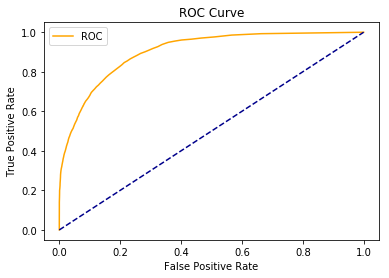

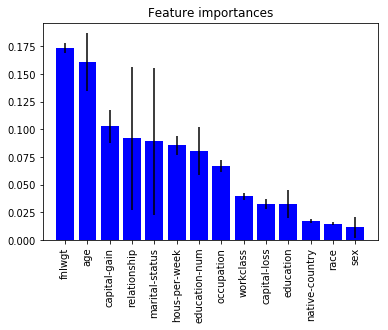

In [5]:
# run it in Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=85, random_state=1)
forest= forest.fit(df_x,df_y)

predictInfo(forest,"Random Forest")


-----SVM------
Mismatched training data: 4746
Mismatched test data: 2481
Accuracy score: 0.84761
AUC: 0.89


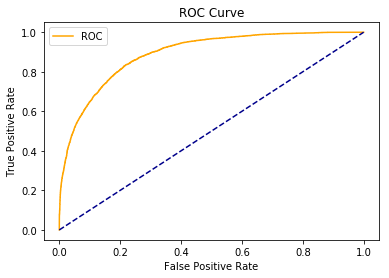

In [6]:
# implement SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, C=1.0, gamma=0.025,probability=True)
svm = svm.fit(df_x, df_y)
predictInfo(svm,"SVM")

In [7]:
# Extract 7 top features from random forest and test the models
df_x = df_x[:, top_7_features]
df_x_v = df_x_v[:, top_7_features]

-----Logistic Regression------
Mismatched training data: 5885
Mismatched test data: 2957
Accuracy score: 0.81838
AUC: 0.84


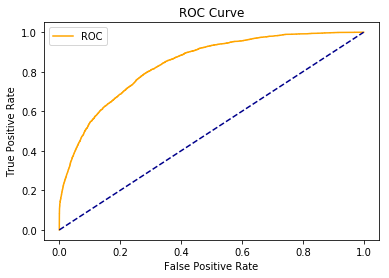

-----Decision Tree------
Mismatched training data: 24
Mismatched test data: 3355
Accuracy score: 0.79393
AUC: 0.72


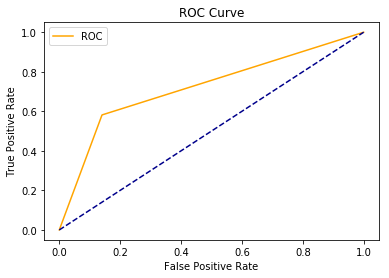

-----Random Forest-Top7------
Mismatched training data: 26
Mismatched test data: 2752
Accuracy score: 0.83097
AUC: 0.88


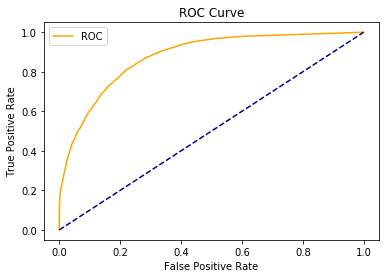

In [8]:
# Logistic Regression
lr = LogisticRegression(max_iter=100, tol=1e-3, C=1, solver='liblinear', multi_class='ovr')
lr = lr.fit(df_x, df_y)
predictInfo(lr,"Logistic Regression")

# Decision Tree
dt = DecisionTreeClassifier()
dt = dt.fit(df_x,df_y)
predictInfo(dt,"Decision Tree")

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=85, random_state=1)
forest= forest.fit(df_x,df_y)

predictInfo(forest,"Random Forest-Top7")